### Imports

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

### Helper functions

In [79]:
# Function to create heatmap
%matplotlib


def heatmap_generator(data, smoothing_type):
    x = data.decimation_factor[data.f1 == 1]
    colo = data.f1[data.f1 == 1]
    z = data.invalidation_d[data.f1 == 1]
    if smoothing_type == "humfrey":
        y = data.num_humfrey_iters[data.f1 == 1]
        smoothing_type_iters = "num_humfrey_iters"
    elif smoothing_type == "bilaplacian":
        y = data.num_bilaplacian_iters[data.f1 == 1]
        smoothing_type_iters = "num_bilaplacian_iters"
    elif smoothing_type == "voxelization":
        y = data.cube_side_len[data.f1 == 1]
        smoothing_type_iters = "cube_side_len"


    # creating figures
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    # setting color bar
    color_map = cm.ScalarMappable(cmap=cm.Greens_r)
    color_map.set_array(colo)

    # creating the heatmap
    img = ax.scatter(x, y, z, marker='s',
                    s=200, color='green')
    plt.colorbar(color_map)

    # adding title and labels
    ax.set_title("3D Heatmap")
    ax.set_xlabel('decimation_factor')
    ax.set_ylabel(smoothing_type_iters)
    ax.set_zlabel('invalidation_d')

    # displaying plot
    plt.show()

Using matplotlib backend: MacOSX


### Visualizing humfrey param sweep 1

In [3]:
import os
file_list = os.listdir("agents/Data/Humfrey_sweep_1")

seg = pd.DataFrame()
for f in file_list:
    seg = pd.concat([seg, pd.read_csv("agents/Data/Humfrey_sweep_1/"+f)])

In [71]:
# Scatterplot
fig, ax = plt.subplots()
sns.scatterplot(data=seg, x="invalidation_d", y="decimation_factor", hue = "f1", ax = ax, style = "num_humfrey_iters")
ax.legend(bbox_to_anchor=(1.1, 1.05))

In [47]:
# Generating heatmap
heatmap_generator(data=seg, smoothing_type="humfrey")


### Testing humfrey across seg ids
#### invalidation_d = 5600, num_humfrey_iters = 125, decimation_factor = 0.5/0.6/0.7

In [5]:
# Reading in data
f1_across_segs_05 = pd.read_csv("agents/Data/results_05.csv")
f1_across_segs_05.columns.values[0] = "index"
f1_across_segs_06 = pd.read_csv("agents/Data/results_06.csv")
f1_across_segs_06.columns.values[0] = "index"
f1_across_segs_07 = pd.read_csv("agents/Data/results_07.csv")
f1_across_segs_07.columns.values[0] = "index"

In [75]:
# Generating histograms to visualize how many of each f1 score are there
fig, axes = plt.subplots(2, 2)


sns.histplot(data=f1_across_segs_05, x="f1", color="darkorange", ax=axes[0, 0]).set(
    title="f1 scores.inval_d = 5600, humfrey_iters = 125, dec= 0.5")
sns.histplot(data=f1_across_segs_06, x="f1", color="gold", ax = axes[0,1]).set(
    title="f1 scores.inval_d = 5600, humfrey_iters = 125, dec = 0.6")
sns.histplot(data=f1_across_segs_07, x="f1", color="lawngreen", ax = axes[1,0]).set(
    title="f1 scores.inval_d = 5600, humfrey_iters = 125, dec = = 0.7")

[Text(0.5, 1.0, 'f1 scores.inval_d = 5600, humfrey_iters = 125, dec = = 0.7')]

[Text(0.5, 1.0, 'f1 scores across segs (inval_d = 5600, humfrey_iters =125)')]

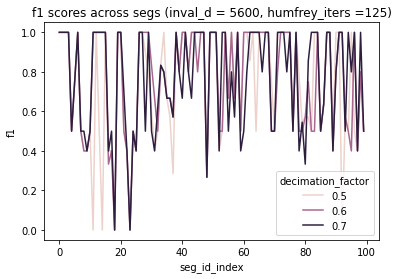

In [6]:
# Plotting f1 scores across all seg ids for inalidation-d = 5600, num_humfrey_iters = 125, decimation_factor = 0.5/0.6/0.7
f1_across_05_06_07 = pd.read_csv("agents/Data/f1_across_segs_05_06_07.csv")
sns.lineplot(
    data=f1_across_05_06_07, x="seg_id_index", y="f1", hue="decimation_factor").set(title="f1 scores across segs (inval_d = 5600, humfrey_iters =125)")

### Visualizing bilaplacian smoothing reuslts - 8/8/22

In [7]:
# Visualizing bilaplacian smoothing results - 8/8/22
bilaplacian_sing_seg = pd.read_csv("agents/Data/bilaplacian_smoothing_results.csv")
bilaplacian_sing_seg.columns.values[9] = "num_bilaplacian_iters"

In [53]:
# Generating heatmap for bilaplacian smoothing 
heatmap_generator(data = bilaplacian_sing_seg, smoothing_type = "bilaplacian")

### Visualizing data from voxelization

In [8]:
# Reading in data for a single seg id across different param combos for voxelization
voxelization_single_seg = pd.read_csv("agents/Data/voxelization_sing_seg.csv")

In [57]:
# Generating heatmap for voxelization
heatmap_generator(data = voxelization_single_seg, smoothing_type = "voxelization")


### Visualizing bilaplacian sweep #1 - 8/9/22

In [9]:
# Visualizing bilaplacian sweep #1 - 8/9/22
bilaplacian_single_seg_sweep_1 = pd.read_csv("agents/Data/Bilaplacian_results.csv")
bilaplacian_single_seg_sweep_1.columns.values[9] = "num_bilaplacian_iters"

In [65]:
# Generating heatmap for bilaplacian sweep #1
heatmap_generator(data = bilaplacian_single_seg_sweep_1, smoothing_type = "bilaplacian")

### Humfrey seingle seg sweep #2 - 8/9/22

In [12]:
# Humrfey single seg sweep #2
import os
file_list = os.listdir("agents/Data/single_seg_humfrey_sweep_2")

humfrey_sweep_2 = pd.DataFrame()
for f in file_list:
    humfrey_sweep_2 = pd.concat(
        [humfrey_sweep_2, pd.read_csv("agents/Data/single_seg_humfrey_sweep_2/"+f)])


In [68]:
# Generating heatmap for humfrey_sweep_2
heatmap_generator(data = humfrey_sweep_2, smoothing_type = "humfrey")